In [1]:
import rdflib
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import FOAF , XSD, Namespace
import pandas as pd
import spacy

In [7]:
graph = rdflib.Graph()
graph.parse('../data/ontology/restaurant.ttl', format='turtle')

<Graph identifier=N4b331e76376e497383724e01e727f064 (<class 'rdflib.graph.Graph'>)>

In [4]:
query_str = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX voc: <https://swapi.co/vocabulary/>
    PREFIX xml: <http://www.w3.org/XML/1998/namespace>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX restaurant: <https://swapi.co/resource/restaurant/>


    SELECT ?p
    WHERE {   
        ?s ?p ?o.
        FILTER(?s=restaurant:1)
    }
    #LIMIT 10
"""
res = graph.query(query_str)
list(res)

[(rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/menu')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/menu')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/attr')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/review')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/review')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/attr')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/menu')),
 (rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/name')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/address')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/menu')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/review')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/attr')),
 (rdflib.term.URIRef('https://swapi.co/vocabulary/menu'))]

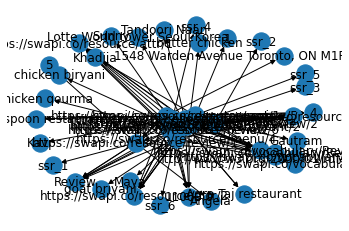

In [9]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

g = rdflib.Graph()
result = g.parse('../data/ontology/restaurant.ttl', format='turtle')

G = rdflib_to_networkx_multidigraph(result)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for 
plt.show()